In [1]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\dharm\AppData\Local\Temp\ipykernel_31596\906979442.py:2: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_vers_data_covid19_vaccine_2020-2022_duplicate_removed.csv')


Symptoms
Headache               95320
Fatigue                83758
Pyrexia                83228
Pain                   74089
Chills                 68907
Dizziness              56530
Nausea                 54952
Pain in extremity      50199
Dyspnoea               35365
Injection site pain    35224
Name: count, dtype: int64


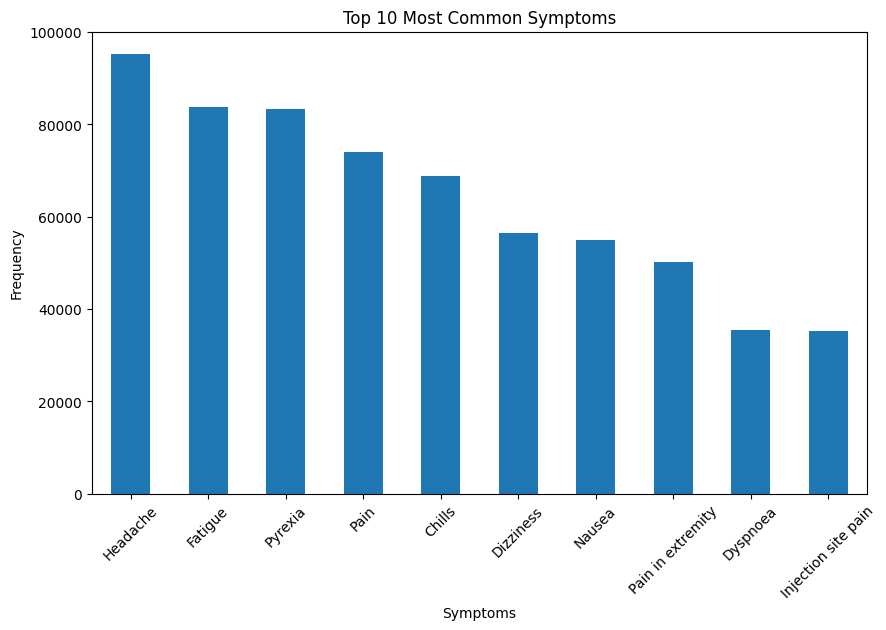

In [19]:
# Read the CSV file
df = pd.read_csv('cleaned_vers_data_covid19_vaccine_2020-2022_duplicate_removed.csv')
# Concatenate the symptom columns into a single column
# symptoms = pd.concat([df['SYMPTOM1'], df['SYMPTOM2'], df['SYMPTOM3'], df['SYMPTOM4']], ignore_index=True)
# df['symp'] = symptoms
# Split the 'Symptoms' column by comma and create a list of all symptoms
all_symptoms = df['Symptoms'].str.split(',').explode().str.strip()
df['symp'] = df['Symptoms']
# Count the occurrences of each symptom
symptom_counts = all_symptoms.value_counts()
# Get the top 15 most common symptoms
top_10_symptoms = symptom_counts.head(10)
print(top_10_symptoms)
# Plot the bar chart
plt.figure(figsize=(10, 6))
top_10_symptoms.plot(kind='bar')
plt.title('Top 10 Most Common Symptoms')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [20]:
df.head()
df.columns.to_list()

['VAERS_ID',
 'RECVDATE',
 'STATE',
 'AGE_YRS',
 'CAGE_YR',
 'SEX',
 'SYMPTOM_TEXT',
 'DIED',
 'DATEDIED',
 'L_THREAT',
 'ER_VISIT',
 'HOSPITAL',
 'HOSPDAYS',
 'X_STAY',
 'DISABLE',
 'RECOVD',
 'VAX_DATE',
 'ONSET_DATE',
 'NUMDAYS',
 'V_ADMINBY',
 'OTHER_MEDS',
 'CUR_ILL',
 'HISTORY',
 'PRIOR_VAX',
 'FORM_VERS',
 'TODAYS_DATE',
 'BIRTH_DEFECT',
 'OFC_VISIT',
 'ER_ED_VISIT',
 'ALLERGIES',
 'SYMPTOM1',
 'SYMPTOMVERSION1',
 'SYMPTOM2',
 'SYMPTOMVERSION2',
 'SYMPTOM3',
 'SYMPTOMVERSION3',
 'SYMPTOM4',
 'SYMPTOMVERSION4',
 'SYMPTOM5',
 'SYMPTOMVERSION5',
 'Symptoms',
 'VAX_TYPE',
 'VAX_MANU',
 'VAX_DOSE_SERIES',
 'VAX_ROUTE',
 'VAX_NAME',
 'symp']

<Axes: >

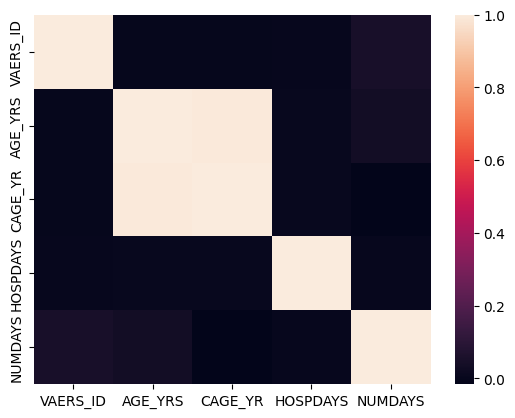

In [21]:
# corealtion heat map for the data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# create a dataset from df with only numeric values
heattmap_data = df.select_dtypes(include=['float64', 'int64'])
# remove FORM_VERS column because iit iis constant
heattmap_data = heattmap_data.drop(columns=['FORM_VERS'])

sns.heatmap(heattmap_data.corr())

In [22]:
# true and false dataset
bool_data = df.select_dtypes(include=['bool'])
# get bool data from df
bool_data = df.select_dtypes(include=['bool'])
bool_data

""
0
1
2
3
4
...
556853
556854
556855
556856


In [23]:
df["OFC_VISIT"].value_counts()
df['symp']

0               Hypoaesthesia, Injection site hypoaesthesia
1                                                  Headache
2                           Erythema, Feeling hot, Flushing
3         Dizziness, Electrocardiogram normal, Hyperhidr...
4         Dysgeusia, Sensory disturbance, Oral pruritus,...
                                ...                        
556853       Brain neoplasm, Condition aggravated, Neoplasm
556854           Incorrect product formulation administered
556855                                             Tinnitus
556856    Back pain, Neck pain, Burning sensation, Pain,...
556857    Atrial fibrillation, Cardiac failure, Oedema p...
Name: symp, Length: 556858, dtype: object

In [24]:
# convert top_10_symptoms to a list
top_10_symptoms_list = top_10_symptoms.index.to_list()
filtered_df = df[df['symp'].isin(top_10_symptoms_list)]
filtered_df

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,SEX,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,...,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5,Symptoms,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE,VAX_NAME,symp
1,902440,12/15/2020,AZ,35.0,35.0,F,C/O Headache,N,Not applicable,N,...,0.0,No symptom,0.0,Headache,COVID19,PFIZER\BIONTECH,1,SYR,COVID19 (COVID19 (PFIZER-BIONTECH)),Headache
21,902650,12/16/2020,MO,34.0,34.0,F,"Patient received shot and sat for 15 minutes, ...",N,Not applicable,N,...,0.0,No symptom,0.0,Dizziness,COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH)),Dizziness
42,902755,12/16/2020,VA,32.0,32.0,M,"Headache, onset ~45 minutes after injection",N,Not applicable,N,...,0.0,No symptom,0.0,Headache,COVID19,PFIZER\BIONTECH,1,SYR,COVID19 (COVID19 (PFIZER-BIONTECH)),Headache
108,902988,12/17/2020,NC,61.0,61.0,F,I was tired and took a two hour nap,N,Not applicable,N,...,0.0,No symptom,0.0,Fatigue,COVID19,PFIZER\BIONTECH,UNK,IM,COVID19 (COVID19 (PFIZER-BIONTECH)),Fatigue
120,903011,12/17/2020,IL,68.0,54.0,F,"started feeling nauseated, had her sit until f...",N,Not applicable,N,...,0.0,No symptom,0.0,Nausea,COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH)),Nausea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555603,2542182,12/23/2022,NJ,55.0,55.0,M,pain at the injection site,N,Not applicable,N,...,0.0,No symptom,0.0,Injection site pain,COVID19,PFIZER\BIONTECH,3,IM,COVID19 (COVID19 (PFIZER-BIONTECH)),Injection site pain
555706,2542859,12/25/2022,MA,65.0,65.0,F,"Site: Pain at Injection Site-Severe, Additiona...",N,Not applicable,N,...,0.0,No symptom,0.0,Injection site pain,COVID19-2,MODERNA,3,IM,COVID19 (COVID19 (MODERNA BIVALENT)),Injection site pain
556362,2545270,12/28/2022,OH,63.0,63.0,M,Persistent soreness at/near injection site.,N,Not applicable,N,...,0.0,No symptom,0.0,Injection site pain,COVID19-2,PFIZER\BIONTECH,3,IM,COVID19 (COVID19 (PFIZER-BIONTECH BIVALENT)),Injection site pain
556537,2545850,12/29/2022,MD,0.5,0.0,M,Dec 16 around 3:00 began running low grade fev...,N,Not applicable,N,...,0.0,No symptom,0.0,Pyrexia,COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH)),Pyrexia


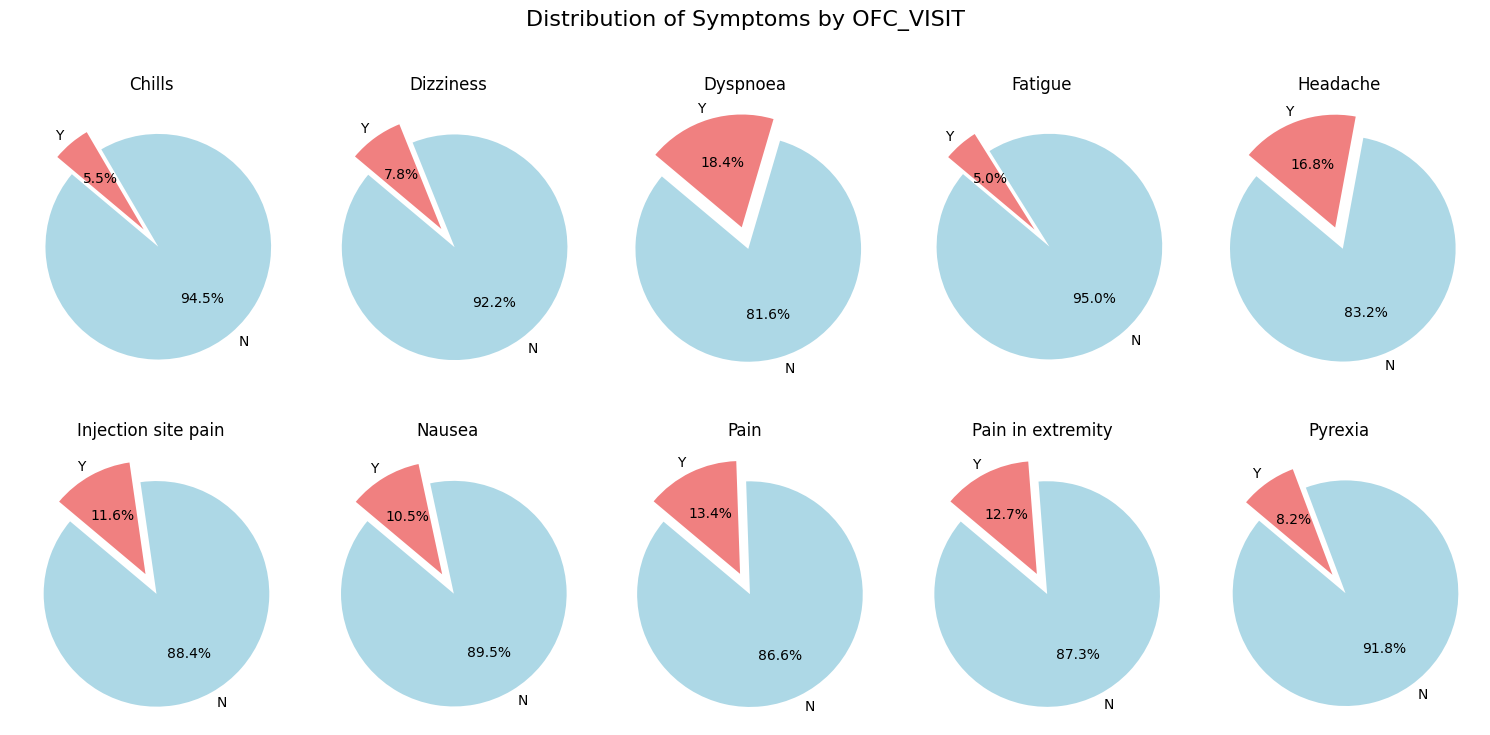

In [25]:
# Create a new DataFrame with counts for each symptom and gender
symptom_gender_counts = filtered_df.groupby(['symp', 'OFC_VISIT']).size().unstack(fill_value=0)
# symptom_gender_counts["Arthralgia"]
# Set up subplots
num_symptoms = len(symptom_gender_counts)
num_cols = 5  # Adjust the number of columns based on your preference
num_rows = (num_symptoms + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 8))

# Iterate over each symptom and plot a pie chart
for i, (symptom, row) in enumerate(symptom_gender_counts.iterrows()):
    row_index = i // num_cols
    col_index = i % num_cols

    colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightgrey']  # Customize colors as needed
    explode = (0.1,) * len(row.index)  # Adjust the explode values to have the same length as the number of categories

    axes[row_index, col_index].pie(row, labels=row.index, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
    axes[row_index, col_index].set_title(f'{symptom}')

# Add main title
main_title = "Distribution of Symptoms by OFC_VISIT"
plt.suptitle(main_title, fontsize=16)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

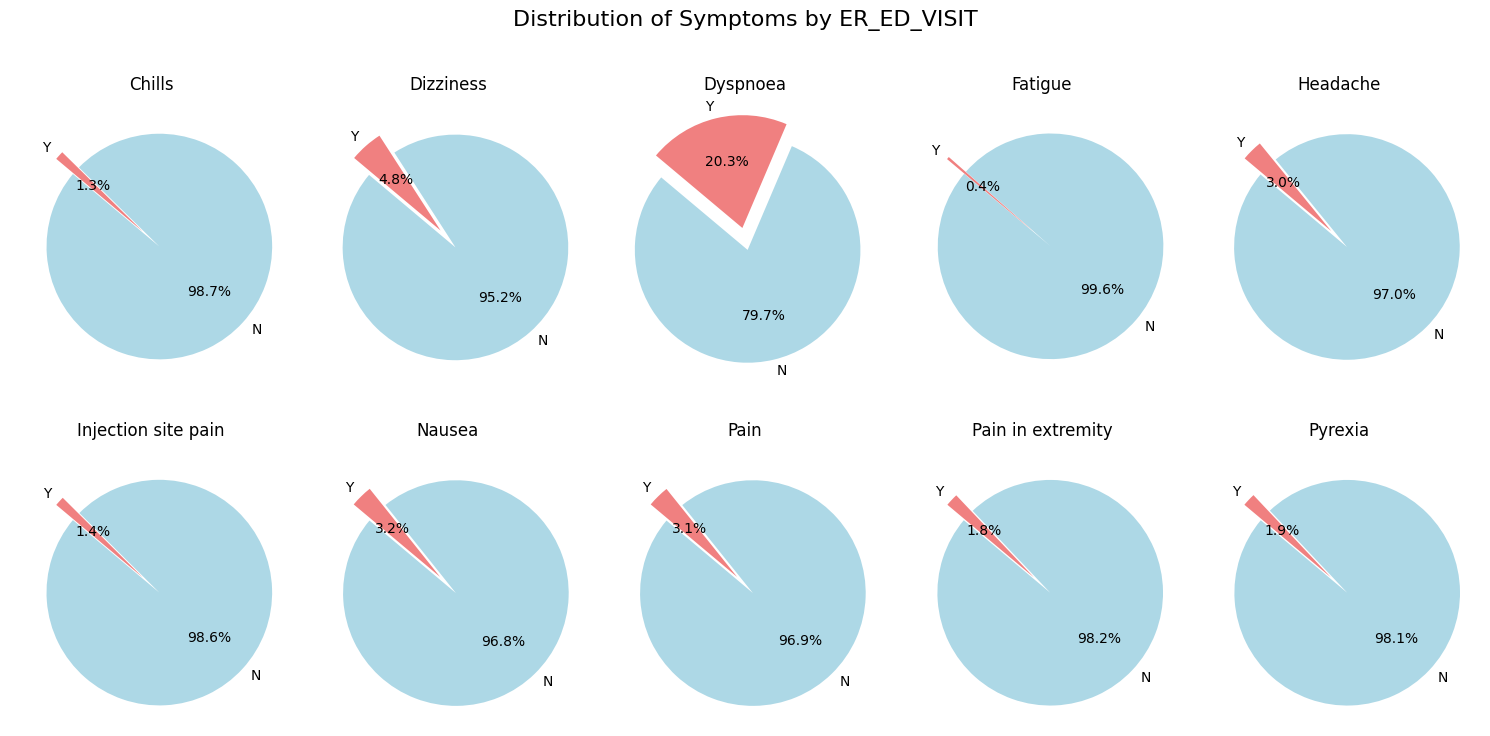

In [26]:
# Create a new DataFrame with counts for each symptom and gender
symptom_gender_counts = filtered_df.groupby(['symp', 'ER_ED_VISIT']).size().unstack(fill_value=0)
# symptom_gender_counts["Arthralgia"]
# Set up subplots
num_symptoms = len(symptom_gender_counts)
num_cols = 5  # Adjust the number of columns based on your preference
num_rows = (num_symptoms + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 8))

# Iterate over each symptom and plot a pie chart
for i, (symptom, row) in enumerate(symptom_gender_counts.iterrows()):
    row_index = i // num_cols
    col_index = i % num_cols

    colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightgrey']  # Customize colors as needed
    explode = (0.1,) * len(row.index)  # Adjust the explode values to have the same length as the number of categories

    axes[row_index, col_index].pie(row, labels=row.index, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
    axes[row_index, col_index].set_title(f'{symptom}')

# Add main title
main_title = "Distribution of Symptoms by ER_ED_VISIT"
plt.suptitle(main_title, fontsize=16)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

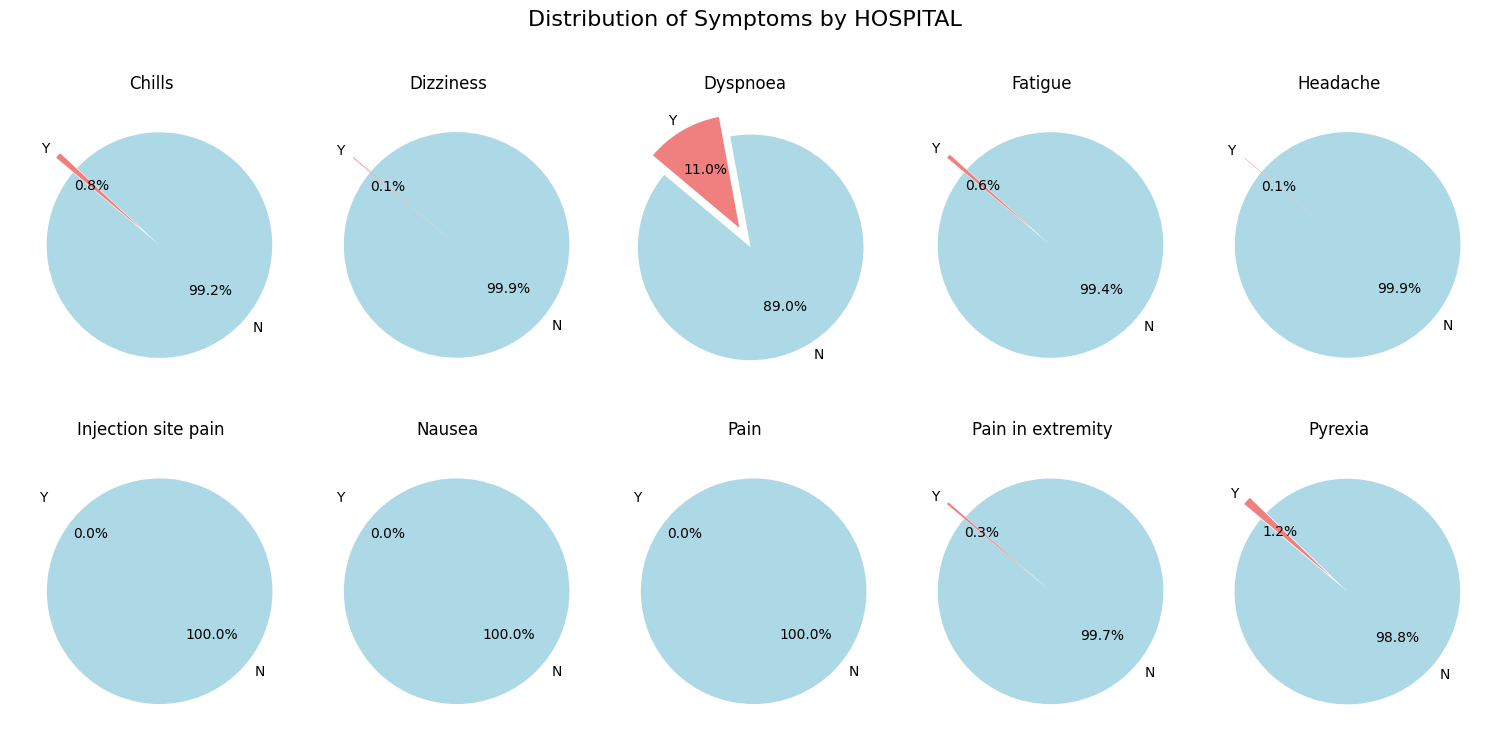

In [27]:

# Create a new DataFrame with counts for each symptom and gender
symptom_gender_counts = filtered_df.groupby(['symp', 'HOSPITAL']).size().unstack(fill_value=0)
# symptom_gender_counts["Arthralgia"]
# Set up subplots
num_symptoms = len(symptom_gender_counts)
num_cols = 5  # Adjust the number of columns based on your preference
num_rows = (num_symptoms + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 8))

# Iterate over each symptom and plot a pie chart
for i, (symptom, row) in enumerate(symptom_gender_counts.iterrows()):
    row_index = i // num_cols
    col_index = i % num_cols

    colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightgrey']  # Customize colors as needed
    explode = (0.1,) * len(row.index)  # Adjust the explode values to have the same length as the number of categories

    axes[row_index, col_index].pie(row, labels=row.index, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
    axes[row_index, col_index].set_title(f'{symptom}')

# Add main title
main_title = "Distribution of Symptoms by HOSPITAL"
plt.suptitle(main_title, fontsize=16)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

In [28]:
symptom_gender_counts

HOSPITAL,N,Y
symp,,
Chills,236,2
Dizziness,2633,3
Dyspnoea,478,59
Fatigue,519,3
Headache,1463,1
Injection site pain,1033,0
Nausea,380,0
Pain,352,0
Pain in extremity,1526,5
